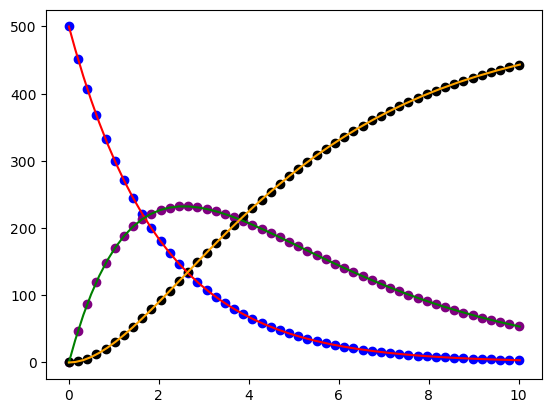

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def FuncionSistema(valores, tiempo, masa=1):
    n1, n2, n3 = valores
    coeficiente1 = 0.5
    coeficiente2 = 0.3
    dn1dt = -0.5 * n1
    dn2dt = 0.5 * n1 - 0.3 * n2
    dn3dt = 0.3 * n2
    return np.array([dn1dt, dn2dt, dn3dt])

valores_iniciales = np.array([500, 0, 0])
tiempo = np.linspace(0, 10, 50)
solucion = odeint(FuncionSistema, valores_iniciales, tiempo, args=(1.3,))

def Incremento(funcion, valores, tiempo, paso):
    estado1 = np.array([valores[0], valores[1], valores[2]])
    K1 = funcion(estado1, tiempo)
    estado2 = np.array([valores[0] + 0.5 * paso * K1[0], valores[1] + 0.5 * paso * K1[1], valores[2] + 0.5 * paso * K1[2]])
    K2 = funcion(estado2, tiempo + 0.5 * paso)
    estado3 = np.array([valores[0] + 0.5 * paso * K2[0], valores[1] + 0.5 * paso * K2[1], valores[2] + 0.5 * paso * K2[2]])
    K3 = funcion(estado3, tiempo + 0.5 * paso)
    estado4 = np.array([valores[0] + paso * K3[0], valores[1] + paso * K3[1], valores[2] + paso * K3[2]])
    K4 = funcion(estado4, tiempo + paso)
    Deltaf = paso * (K1 + 2 * K2 + 2 * K3 + K4) / 6
    return valores + Deltaf

def MetodoAdaptativo(funcion, valores_iniciales, tiempo, tolerancia=1e-4):
    paso = tiempo[1] - tiempo[0]
    tiempo_final = tiempo[-1]
    tiempo = tiempo[0]
    valores = valores_iniciales
    Tiempo = np.array([tiempo])
    Vector = valores
    while tiempo < tiempo_final:
        r1 = Incremento(funcion, valores, tiempo, paso)
        r2 = Incremento(funcion, r1, tiempo + paso, paso)
        rt = Incremento(funcion, valores, tiempo, 2 * paso)
        error = np.linalg.norm(r2 - rt)
        if error < tolerancia:
            tiempo += 2 * paso
            valores = rt
            Vector = np.vstack((Vector, valores))
            Tiempo = np.append(Tiempo, tiempo)
        q = 0.85 * (tolerancia / error) ** (1 / 4)
        paso = paso * q
    return Tiempo, Vector

mi_tiempo, mi_vector = MetodoAdaptativo(FuncionSistema, valores_iniciales, tiempo)

plt.plot(mi_tiempo, mi_vector[:, 0], color='red')
plt.scatter(tiempo, solucion[:, 0], color='blue')
plt.plot(mi_tiempo, mi_vector[:, 1], color='green')
plt.scatter(tiempo, solucion[:, 1], color='purple')
plt.plot(mi_tiempo, mi_vector[:, 2], color='orange')
plt.scatter(tiempo, solucion[:, 2], color='black')
